In [10]:
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import requests
from pycocotools.coco import COCO
import os
import random
from collections import defaultdict, OrderedDict
import json
from tqdm import tqdm
import sys
from IPython.display import display


In [2]:
coco_annotation_file_path = "../data/rpc/annotations/instances_train2019.json"
COCO_TRAIN = COCO(annotation_file=coco_annotation_file_path)
coco_annotation_file_path = "../data/rpc/annotations/instances_val2019.json"
COCO_VAL = COCO(annotation_file=coco_annotation_file_path)
coco_annotation_file_path = "../data/rpc/annotations/instances_test2019.json"
COCO_TEST = COCO(annotation_file=coco_annotation_file_path)
# coco_annotation_file_path = "synthesize_100_test.json"
# COCO_CHECK = COCO(annotation_file=coco_annotation_file_path)

loading annotations into memory...
Done (t=2.97s)
creating index...
index created!
loading annotations into memory...
Done (t=0.75s)
creating index...
index created!
loading annotations into memory...
Done (t=2.79s)
creating index...
index created!


673


<Figure size 480x320 with 0 Axes>

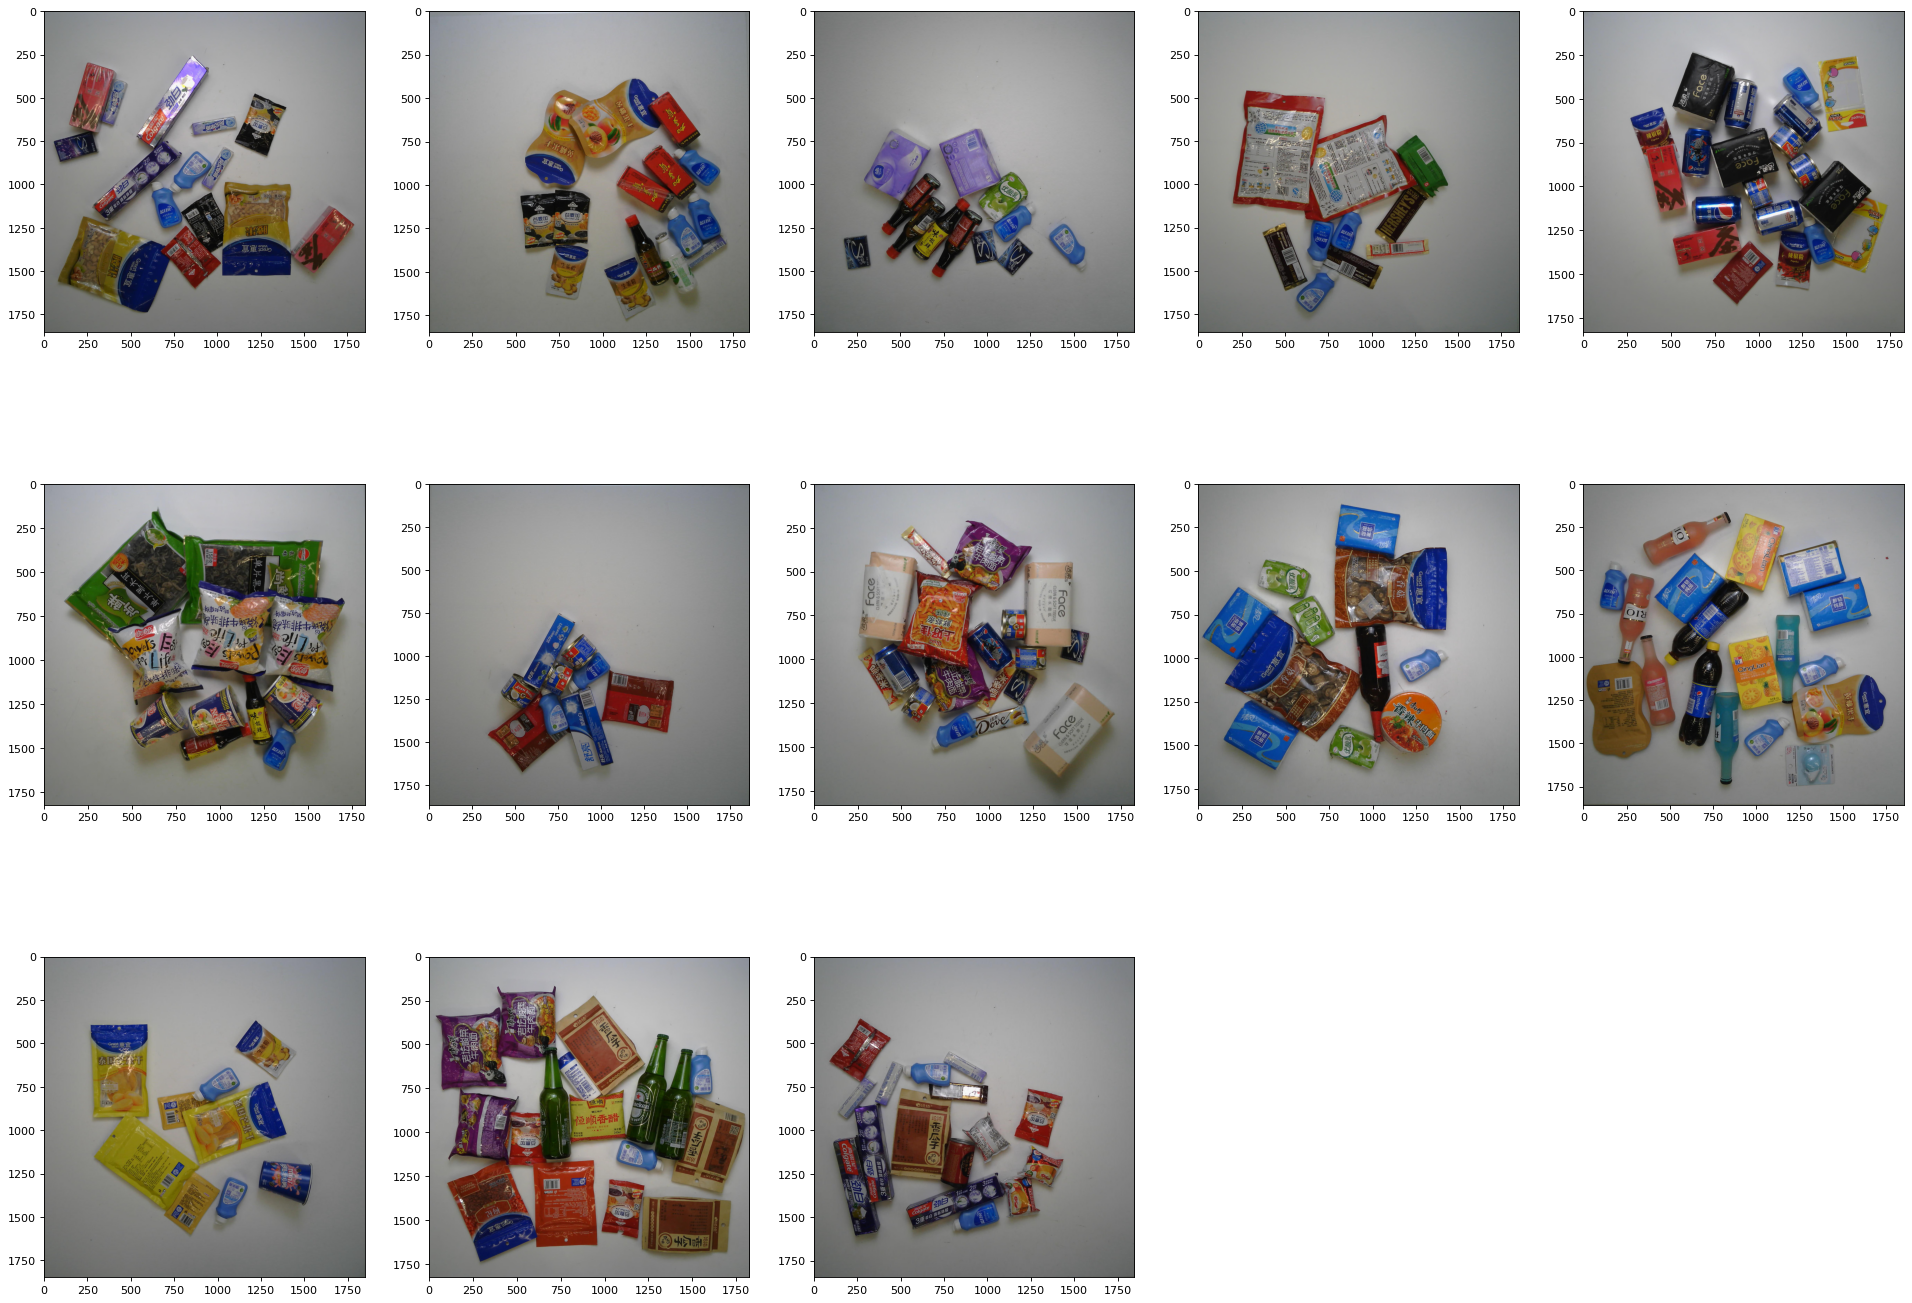

In [16]:
catIds = [168]
print(len([i['file_name'] for i in COCO_TEST.loadImgs(COCO_TEST.getImgIds(catIds=catIds))]))
filenames = [i['file_name'] for i in COCO_TEST.loadImgs(COCO_TEST.getImgIds(catIds=catIds))]
filenames.sort()
# for filename in filenames:
#     im = Image.open(os.path.join('../data/rpc/test2019', filename))
#     plt.figure()
#     plt.imshow(im)
images = []
for filename in filenames:
    images.append(mpimg.imread(os.path.join('D:/datasets/retail_product_checkout/test2019', filename)))
images = random.choices(images, k=int(len(images)/50))
plt.gcf().set_dpi(80)
plt.figure(figsize=(30,30))
columns = 5
for i, image in enumerate(images):
    plt.subplot(int(len(images) / columns + 1) + 1, columns, i + 1)
    plt.imshow(image)